# Forschungsdaten der  Berlin-Brandenburgischen Akademie der Wissenschaften

<a id="0"></a>
## Inhalt

<a id="0"></a>
## Inhalt

1. [Statistische Beschreibung des Datensatzes](#1)

2. [Univariate Plots](#2)

   [Entstehungszeit der Forschungsdaten](#2.4)

   [Verteilung der Publisher](#2.5)

   [Verteilung der Lizenzangaben](#2.6)

   [Verteilung des Ressourcentyps](#2.7)
   
   [Verteilung des Ressourcenformats](#2.8)

3. [Word Clouds](#3)

   [Häufige Titelbegriffe](#3.1)

   [Beschreibung der Ressource](#3.2)

   [Thema der Ressource](#3.3)

   [Urheber*innen](#3.4)

4. [Bi- und multivariate Plots](#4)

<a id="1"></a>
## 1 Statistische Beschreibung des Datensatzes

[Zurück zum Anfang](#0)

In [60]:
# Importieren der Bibliotheken
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Laden der Daten
data_bbaw = pd.read_csv(r'../../data/refined/clarin/bbaw/bbaw-records-20240620_refined.csv')
# Umwandeln der Datentypen der Zeitangaben in datetime-Objekte
data_bbaw[['date', 'datestamp']] = data_bbaw[['date', 'datestamp']].apply(pd.to_datetime, errors='coerce')

In [61]:
YlOrBr_palette = sns.color_palette('YlOrBr', 8, as_cmap=False)
YlOrBr_hex = YlOrBr_palette.as_hex()
print(YlOrBr_hex)
sns.color_palette('YlOrBr', 8)

['#fff8c1', '#fee89b', '#fece65', '#fead3a', '#f6861f', '#e1640e', '#c04602', '#933204']


[(1.0, 0.9724413687043445, 0.7568012302960401),
 (0.9970319108035371, 0.9092656670511341, 0.6096270665128797),
 (0.996078431372549, 0.8091503267973856, 0.39607843137254906),
 (0.996078431372549, 0.6767089580930412, 0.22857362552864285),
 (0.9639677047289504, 0.5268589004229143, 0.12332179930795847),
 (0.8836601307189543, 0.39215686274509803, 0.054901960784313725),
 (0.7513725490196079, 0.27515570934256056, 0.009750096116878123),
 (0.5756862745098039, 0.19677047289504038, 0.016639753940792004)]

In [62]:
data_bbaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17723 entries, 0 to 17722
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   datestamp                  5854 non-null   datetime64[ns, UTC]
 1   identifier                 17500 non-null  object             
 2   subject                    10218 non-null  object             
 3   title                      5854 non-null   object             
 4   publisher                  5854 non-null   object             
 5   date                       4650 non-null   datetime64[ns, UTC]
 6   type                       5846 non-null   object             
 7   language                   5831 non-null   object             
 8   source                     5831 non-null   object             
 9   rights                     5830 non-null   object             
 10  creator                    3622 non-null   object             
 11  fo

In [63]:
data_bbaw.head()

,datestamp,identifier,subject,title,publisher,date,type,language,source,rights,creator,format,format - mediatype,format - subtype,relation,contributor,description,coverage,record - header - setSpec
0,2022-12-12 11:38:53+00:00,https://hdl.handle.net/21.11120/0000-0008-3175-D,webservice,SynCoP - Dependency Parser,Digitales Wörterbuch der deutschen Sprache (DWDS),2016-07-29 15:34:22+00:00,text,NaN,NaN,NaN,"Didakowski, Jörg",NaN,NaN,NaN,WebLichtWebServices,WebLichtWebServices,WebLichtWebServices,NaN,WebLichtWebServices
1,2022-12-12 11:38:53+00:00,https://hdl.handle.net/21.11120/0000-0008-3188-7,NaN,WebLichtWebServices,WebLichtWebServices,2014-01-20 15:36:36+00:00,NaN,NaN,NaN,NaN,WebLichtWebServices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WebLichtWebServices
2,2022-12-12 11:38:53+00:00,https://hdl.handle.net/21.11120/0000-0008-3189-6,NaN,WebLichtWebServices,WebLichtWebServices,2014-01-20 15:36:40+00:00,NaN,NaN,NaN,NaN,WebLichtWebServices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WebLichtWebServices
3,2022-12-12 11:38:53+00:00,https://hdl.handle.net/21.11120/0000-0008-318C-3,webservice,dlexDB Types,Lexikalische Datenbank (dlexDB),2016-09-06 15:36:12+00:00,text,NaN,NaN,NaN,"Pohl, Edmund",NaN,NaN,NaN,WebLichtWebServices,WebLichtWebServices,WebLichtWebServices,NaN,WebLichtWebServices
4,2022-12-12 11:38:53+00:00,https://hdl.handle.net/21.11120/0000-0008-318D-2,webservice,dlexDB Types: Frequency per million,Lexikalische Datenbank (dlexDB),2016-08-16 15:36:12+00:00,text,NaN,NaN,NaN,"Pohl, Edmund",NaN,NaN,NaN,WebLichtWebServices,WebLichtWebServices,WebLichtWebServices,NaN,WebLichtWebServices


In [64]:
data_bbaw.describe()

,datestamp,identifier,subject,title,publisher,date,type,language,source,rights,creator,format,format - mediatype,format - subtype,relation,contributor,description,coverage,record - header - setSpec
count,5854,17500,10218,5854,5854,4650,5846,5831,5831,5830,3622,412,412,400,28,26,25,12,5851
unique,NaN,17461,233,4225,9,NaN,1,1,5485,13,1401,7,1,1,7,11,4,7,6
top,NaN,http://de.clarin.eu/de/kurationsprojekt-1-3-ge...,Gebrauchsliteratur,Neue Rheinische Zeitung – Organ der Demokratie...,Deutsches Textarchiv (DTA-Erweiterungen),NaN,text,deu,"Vorau, Stiftsbibl.: Cod. 276, http://www.hands...",CC NC,"Humboldt, Alexander von",text xml,text,xml,WebLichtWebServices,WebLichtWebServices,WebLichtWebServices,http://de.clarin.eu/en/curation-project-1-3-ge...,dta
freq,NaN,4,1774,530,2987,NaN,5846,5831,19,3215,185,400,412,400,14,13,14,4,4711
mean,2022-12-12 11:39:20.827468544+00:00,NaN,NaN,NaN,NaN,1834-04-30 13:13:49.562795520+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2022-12-12 11:38:53+00:00,NaN,NaN,NaN,NaN,1678-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2022-12-12 11:39:08+00:00,NaN,NaN,NaN,NaN,1796-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2022-12-12 11:39:22+00:00,NaN,NaN,NaN,NaN,1848-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2022-12-12 11:39:33+00:00,NaN,NaN,NaN,NaN,1878-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2022-12-12 11:39:47+00:00,NaN,NaN,NaN,NaN,2022-07-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
print(list(data_bbaw.columns))

['datestamp', 'identifier', 'subject', 'title', 'publisher', 'date', 'type', 'language', 'source', 'rights', 'creator', 'format', 'format - mediatype', 'format - subtype', 'relation', 'contributor', 'description', 'coverage', 'record - header - setSpec']


<a id="2"></a>
## 2 Univariate Plots

***Untersuchte Variablen***

- date
- publisher
- rights
- type
- format


[Zurück zum Anfang](#0)


### Entstehungszeit der Ressource

[Zurück zum Anfang](#0)

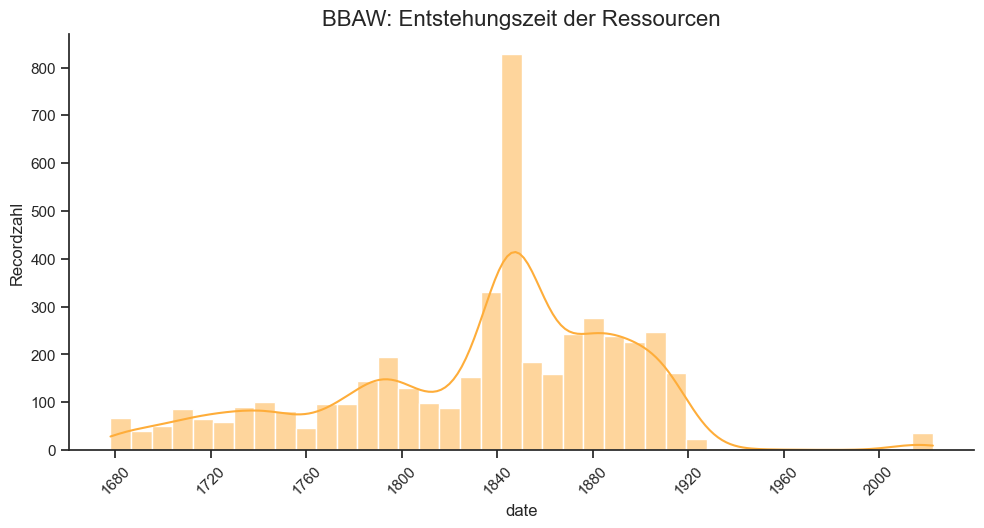

In [66]:
sns.set_theme(style='ticks') # seaborn-Design setzen
g = sns.displot(data_bbaw, x='date', bins=40, kde=True, color = '#fead3a', aspect=2) # Erscheinungszeitpunkt der Forschungsdaten in absolten Zahlen

plt.xticks(rotation=45)
plt.title('BBAW: Entstehungszeit der Ressourcen', fontsize=16)
plt.xlabel('date', fontsize=12)
plt.ylabel('Recordzahl', fontsize=12)
plt.show()


In [67]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

<a id="2.5"></a>
### Verteilung der Publisher

[Zurück zum Anfang](#0)



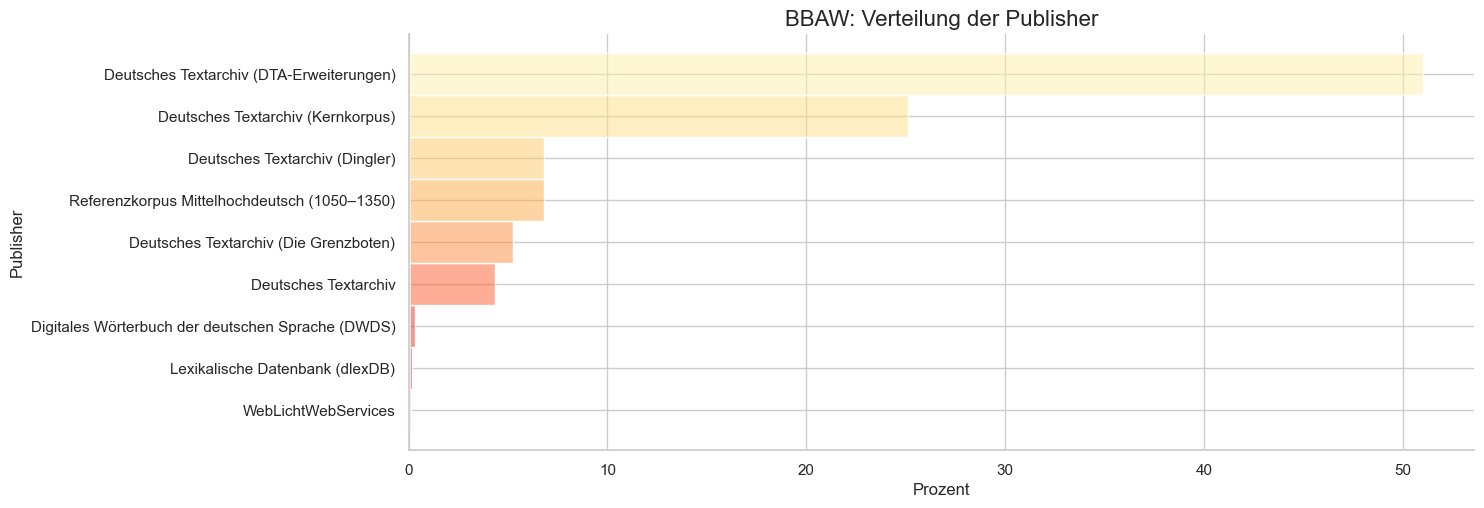

In [68]:
# Reihenfolge der Sprachen festlegen
order = data_bbaw['publisher'].value_counts().index 
# Konvertieren der Daten in kategorische Variablen
data_bbaw['publisher'] = pd.Categorical(data_bbaw['publisher'], categories=order, ordered=True)


sns.set_style('whitegrid')
sns.displot(data_bbaw, y = 'publisher', hue='publisher', palette="YlOrRd", aspect = 3, legend=False, stat = 'percent')


plt.title('BBAW: Verteilung der Publisher', fontsize=16)
plt.xlabel('Prozent', fontsize=12)
plt.ylabel('Publisher', fontsize=12)
plt.show()

<a id="2.6"></a>
### Verteilung der Lizenzangaben

[Zurück zum Anfang](#0)

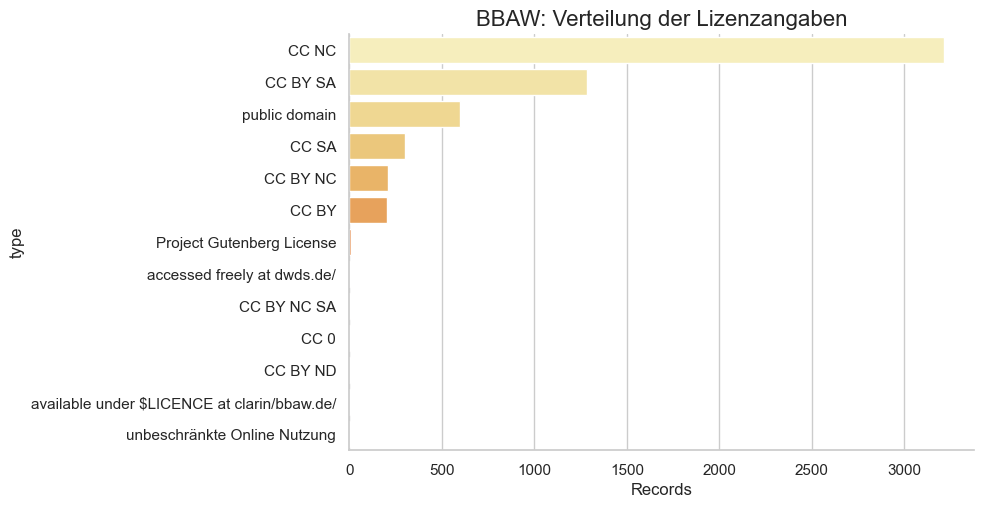

In [69]:
order = data_bbaw['rights'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_bbaw['rights'] = pd.Categorical(data_bbaw['rights'], categories=order, ordered=True)


sns.catplot(data_bbaw, y = 'rights', kind='count', aspect = 2, hue = 'rights', palette="YlOrRd", legend=False)

plt.title('BBAW: Verteilung der Lizenzangaben', fontsize=16)
plt.xlabel('Records', fontsize=12)
plt.ylabel('type', fontsize=12)
plt.show()

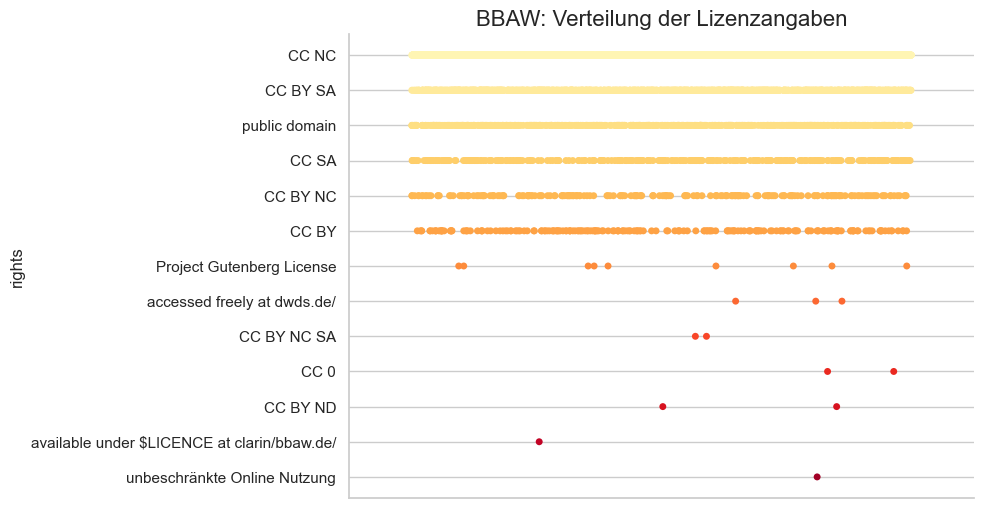

In [70]:
order = data_bbaw['rights'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_bbaw['rights'] = pd.Categorical(data_bbaw['rights'], categories=order, ordered=True)


sns.catplot(data_bbaw, y = 'rights', aspect = 2, hue = 'rights', palette="YlOrRd", jitter=0.4, legend=False)

plt.title('BBAW: Verteilung der Lizenzangaben', fontsize=16)
plt.ylabel('rights', fontsize=12)
plt.show()

<a id="2.7"></a>
### Verteilung des Ressourcentyps

[Zurück zum Anfang](#0)

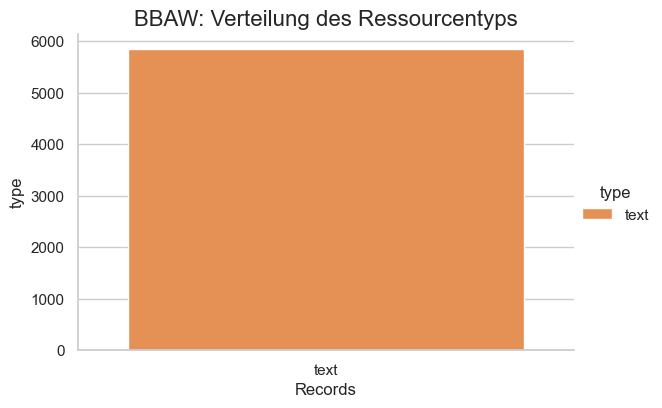

In [71]:
order = data_bbaw['type'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_bbaw['type'] = pd.Categorical(data_bbaw['type'], categories=order, ordered=True)

sns.catplot(data_bbaw, x = 'type', kind = 'count', aspect = 1.5, height=4, hue = 'type', palette='YlOrRd')

plt.title('BBAW: Verteilung des Ressourcentyps', fontsize=16)
plt.xlabel('Records', fontsize=12)
plt.ylabel('type', fontsize=12)
plt.show()


<a id="2.8"></a>
### Verteilung des Ressourcenformats

[Zurück zum Anfang](#0)

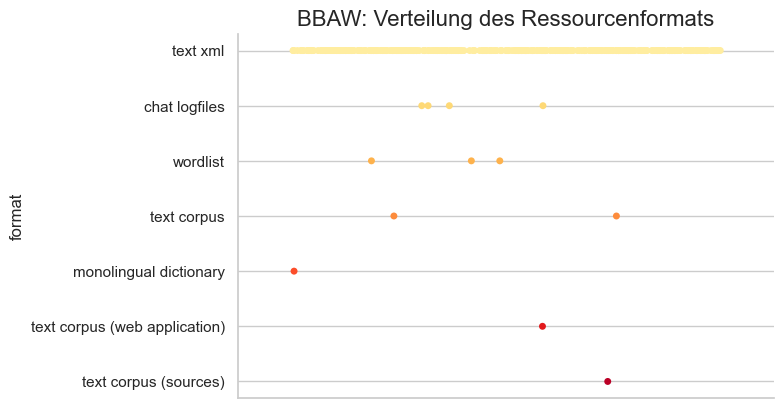

In [72]:
order = data_bbaw['format'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_bbaw['format'] = pd.Categorical(data_bbaw['format'], categories=order, ordered=True)


sns.catplot(data_bbaw, y = 'format', aspect = 2, height=4, hue = 'format', palette="YlOrRd", jitter=0.4, legend=False)

plt.title('BBAW: Verteilung des Ressourcenformats', fontsize=16)
plt.ylabel('format', fontsize=12)
plt.show()

## Word Clouds

   - Häufige Titelbegriffe](#3.1)

   - Beschreibung der Ressource](#3.2)

   - Thema der Ressource](#3.3)

   - Urheber*innen](#3.4)



In [73]:

# Step 1: Fill NaN values with an empty string (to avoid issues when concatenating)
data_bbaw['subject'] = data_bbaw['subject'].fillna('')
print(data_bbaw['subject'].describe())
print(data_bbaw['subject'].head())


count     17723
unique      234
top            
freq       7505
Name: subject, dtype: object
0    webservice
1              
2              
3    webservice
4    webservice
Name: subject, dtype: object


In [74]:

# Step 2: Concatenate all text in the 'subject' column, separating each entry by a whitespace
# Ensure all values are treated as strings and joined correctly

text_data = ' '.join(data_bbaw['subject'].astype(str))

print(text_data)
print(type(text_data)) # successfully concatenated all text data into a single string




webservice   webservice webservice webservice webservice webservice webservice webservice webservice webservice     webservice webservice webservice  webservice  webservice Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wissenschaft   Wi

In [88]:
import re
text_data = re.sub(r'\s+', ' ', text_data).strip()
# Split the string into a list of words
words = text_data.split()

# Sort the list of words alphabetically
sorted_words = sorted(words)

# Join the sorted list back into a single string
sorted_text_data = ' '.join(sorted_words)

# Print or use sorted_text_data as needed
print(sorted_text_data)


(Auto)biographie (Auto)biographie (Auto)biographie (headword (headword (headword (sources) (web (web Alchemie Alchemie Alchemie Alchemie Alchemie Alchemie Allegorese Allegorese Allegorie Allegorie Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Alltag Altertumskunde Altertumskunde Altertumskunde Altertumskunde Amtsdruckschrift Amtsdruckschrift Amtsdruckschrift Amtsdruckschrift Amtsdruckschrift Anatomie Anatomie Anatomie Anatomie Anatomie Andachtsbuch Andachtsbuch Andachtsbuch Andachtsbuch Andachtsbuch Andachtsbuch Andachtsbuch Andachtsbuch Andachtsbuch Andachtsbuch Andachtsbuch Andachtsbuch Andachtsbuch Andachtsbuch Andachtsbuch Andachtsbuch Andachtsbuch Andachtsbuch Andachtsbuch Andachtsbuch Andachtsbuch Andachtsbuch Andachtsbuch Anstandsliteratur Anstandsliteratur Ansta

In [109]:

# Step 3: Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='rocket', max_words=100, collocations=False).generate(text_data)

In [107]:
print(wordcloud.words_)

{'Gebrauchsliteratur': 1.0, 'Zeitung': 0.826944757609921, 'Wissenschaft': 0.822435174746336, 'Belletristik': 0.45659526493799324, 'Leichenpredigt': 0.18883878241262683, 'Zeitschrift': 0.1741826381059752, 'Religion': 0.161217587373168, 'Roman': 0.12232243517474634, 'Theologie': 0.12119503945885006, 'Brief': 0.11443066516347238, 'Lyrik': 0.09188275084554678, 'Gesellschaft': 0.08680947012401354, 'Poesie': 0.0834272829763247, 'Novelle': 0.07102593010146561, 'Gelegenheitsschrift': 0.06820744081172492, 'Tod': 0.0665163472378805, 'Drama': 0.05918827508455468, 'Prosa': 0.05636978579481398, 'Philosophie': 0.052423900789177004, 'Recht': 0.04114994363021421, 'Geographie': 0.03889515219842165, 'Biologie': 0.036076662908680945, 'Sonstiges': 0.03156708004509583, 'Historiographie': 0.02987598647125141, 'Medizin': 0.02874859075535513, 'Jura': 0.02818489289740699, 'Reiseliteratur': 0.02705749718151071, 'Naturwissenschaft': 0.02593010146561443, 'Physik': 0.02536640360766629, 'Kunstgeschichte': 0.0236753

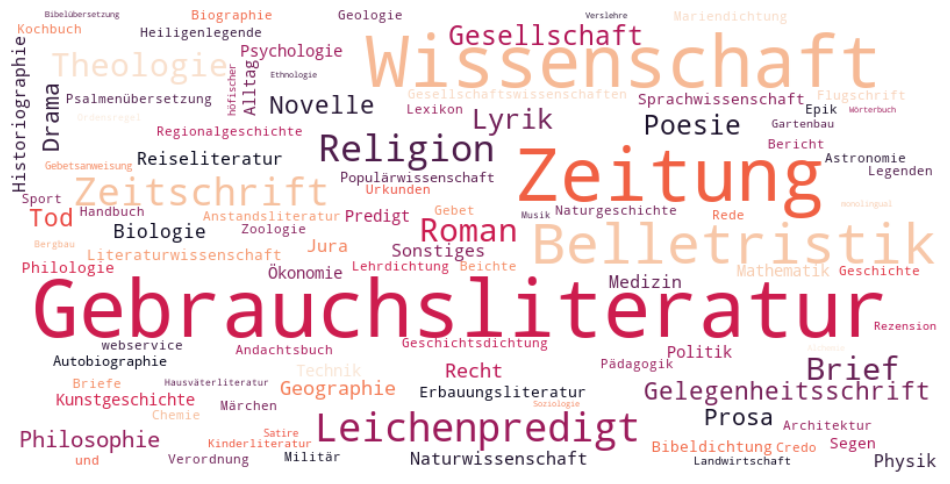

In [110]:
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

{'Zeitung Zeitung': 1.0, 'Wissenschaft Wissenschaft': 0.3125, 'Gebrauchsliteratur Leichenpredigt': 0.25848765432098764, 'Leichenpredigt Gebrauchsliteratur': 0.23996913580246915, 'Gebrauchsliteratur Zeitschrift': 0.23842592592592593, 'Zeitschrift Gebrauchsliteratur': 0.2368827160493827, 'Belletristik Roman': 0.1597222222222222, 'Gebrauchsliteratur Brief': 0.15432098765432098, 'Gebrauchsliteratur Theologie': 0.14969135802469136, 'Brief Gebrauchsliteratur': 0.13734567901234568, 'Theologie Gebrauchsliteratur': 0.1257716049382716, 'Belletristik Lyrik': 0.12345679012345678, 'Gebrauchsliteratur Gesellschaft': 0.11342592592592593, 'Belletristik Novelle': 0.09722222222222222, 'Roman Belletristik': 0.09567901234567901, 'Gebrauchsliteratur Gelegenheitsschrift': 0.0933641975308642, 'Gelegenheitsschrift Tod': 0.09104938271604938, 'Tod Gebrauchsliteratur': 0.0787037037037037, 'Belletristik Drama': 0.07484567901234568, 'Religion Poesie': 0.06867283950617284, 'Gesellschaft Gebrauchsliteratur': 0.0625,

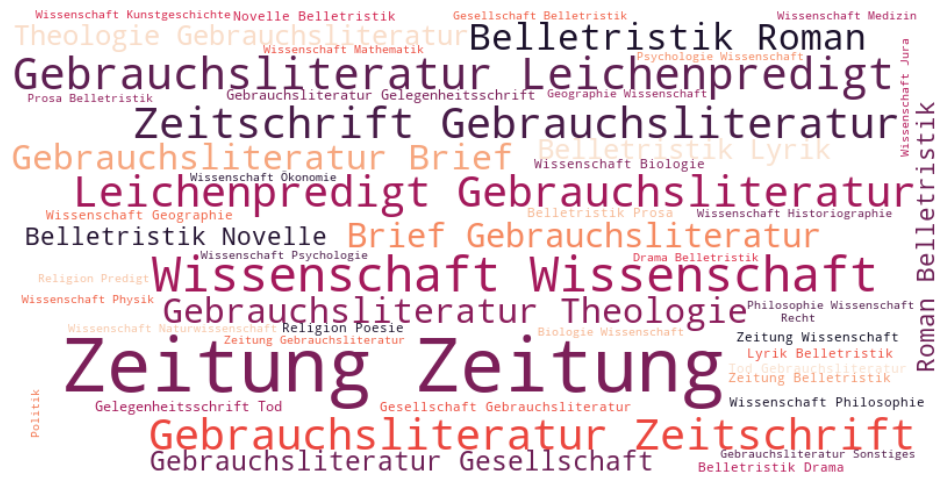

## Bi- und multivariate Plots

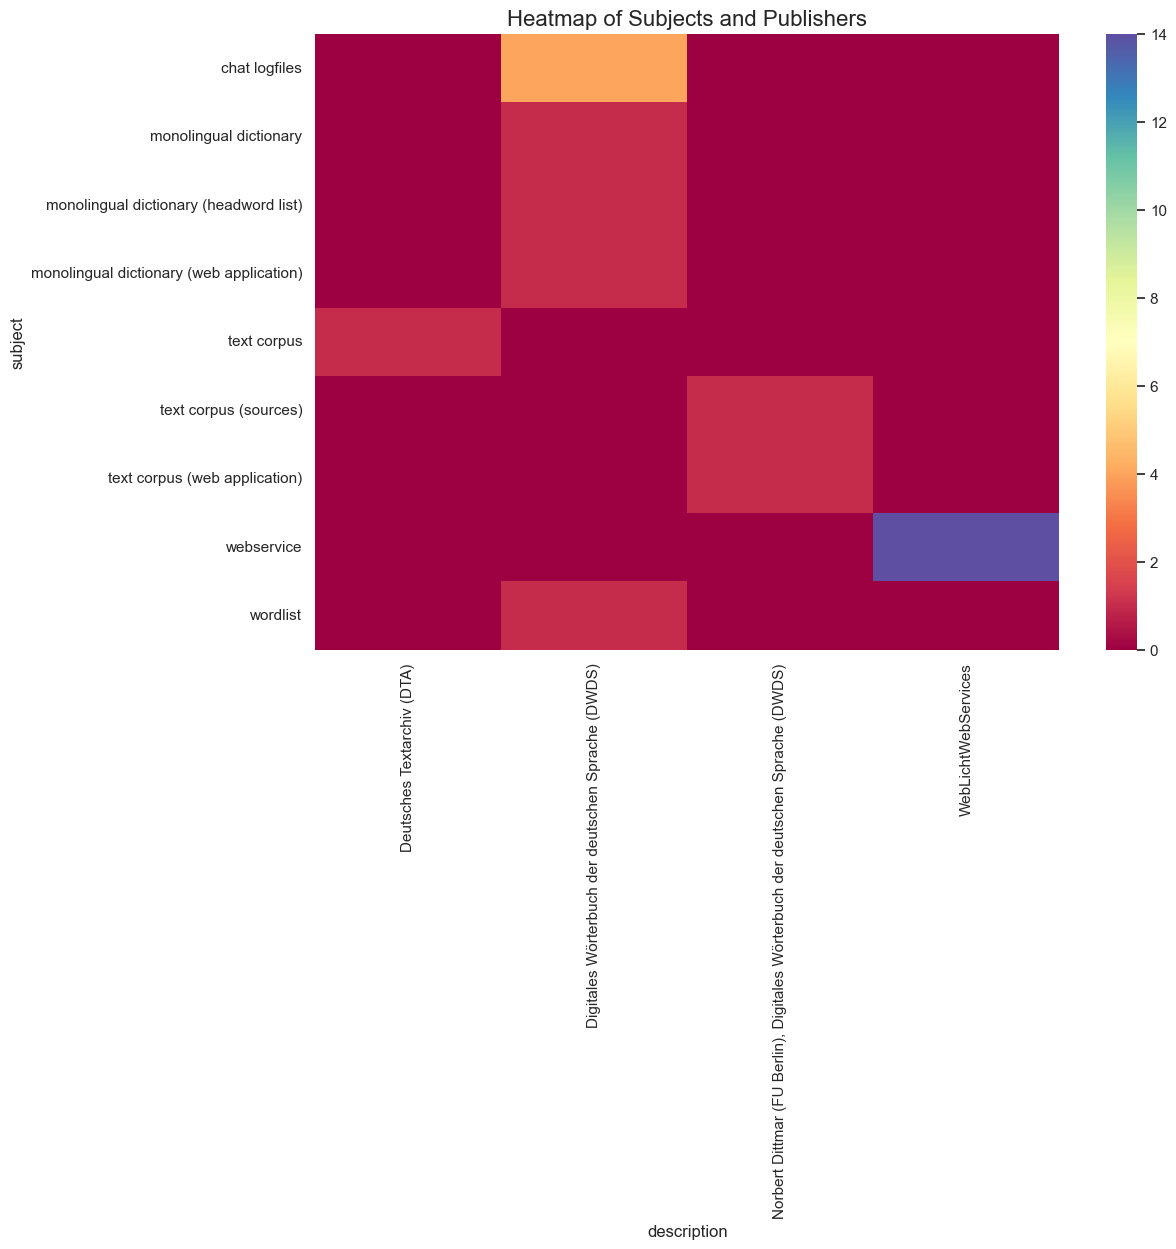

In [80]:
# Create a pivot table
pivot_table = data_bbaw.pivot_table(index='subject', columns='description', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='Spectral')
plt.title('Heatmap of Subjects and Publishers', fontsize=16)
plt.show()
